# Indicadores socioeconômicos das nações (Hierarchical Clustering)
Péricles S. G. Marques / Contato: https://www.linkedin.com/in/periclessavio/

### Objetivo:
Categorizar os países por meio dos indicadores sociais e econômicos

##### Importação da base de dados e os primeiros passos

In [40]:
import pandas as pd #biblioteca que manipula dataframes
paises = pd.read_csv('arquivos/dados_paises.csv') # carrega o arquivo com os dados
paises.head(5) # mostra as primeiras 5 linhas

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [41]:
paises.describe() #estatísticas descritivas, equivale ao "summary() do R"

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##### Padronização dos dados

In [42]:
from sklearn.preprocessing import StandardScaler #biblioteca que faz a padronização/normalização (ZScore)
paises_subset = paises.iloc[:,1:] # vatiando o dataset [:, 1:] = [todas as linhas, coluna 1 até o final (no python os índices começam com 0)]

ss = StandardScaler() #chamar a função
paises_padronizado = ss.fit_transform(paises_subset) #normalizar
paises_padronizado

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

##### Organização

In [43]:
paises_padronizado_df = pd.DataFrame(paises_padronizado)
paises_padronizado_df = pd.concat([paises[['country']], paises_padronizado_df], axis=1) #concatenar dataframes
paises_padronizado_df

,country,0,1,2,3,4,5,6,7,8
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [44]:
paises_padronizado_df.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'] # renomear as colunas
paises_padronizado_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


##### Verificar se as variáveis têm média = 0 e desvio padrão = 1.

In [45]:
import numpy as np # biblioteca para usar as funções mean() e std() (média e desvio padrão)

for i in paises_padronizado_df.columns[1:]:
    print(i+':', round(paises_padronizado_df[i].mean()))

child_mort: 0
exports: 0
health: 0
imports: 0
income: 0
inflation: 0
life_expec: 0
total_fer: 0
gdpp: 0


In [46]:
for i in paises_padronizado_df.columns[1:]:
    print(i+':', paises_padronizado_df[i].std().round())

child_mort: 1.0
exports: 1.0
health: 1.0
imports: 1.0
income: 1.0
inflation: 1.0
life_expec: 1.0
total_fer: 1.0
gdpp: 1.0


##### Calcular a distância (euclidiana)

In [47]:
from scipy.spatial.distance import pdist #calcular a distância
from scipy.spatial.distance import squareform

dist_euclidiana = pdist(X=paises_padronizado, metric='euclidean')
dist_euclidiana = squareform(dist_euclidiana)
print("Euclidiana")
dist_euclidiana

Euclidiana


array([[0.        , 4.1433458 , 3.89755192, ..., 4.51909177, 2.49752689,
        1.49113306],
       [4.1433458 , 0.        , 1.84174508, ..., 2.26701658, 3.15544023,
        4.25190018],
       [3.89755192, 1.84174508, 0.        , ..., 2.73124742, 1.97873559,
        3.61130935],
       ...,
       [4.51909177, 2.26701658, 2.73124742, ..., 0.        , 3.4410128 ,
        4.3667908 ],
       [2.49752689, 3.15544023, 1.97873559, ..., 3.4410128 , 0.        ,
        2.17296707],
       [1.49113306, 4.25190018, 3.61130935, ..., 4.3667908 , 2.17296707,
        0.        ]])

##### 1º Teste: Elaboração da clusterização hierárquica como "single linkage"

In [48]:
from scipy.cluster.hierarchy import linkage #elaboração da clusterização hierárquica

coeficientes_single = linkage(paises_padronizado, method="single", metric='euclidean') #single
coeficientes_single[0:10] # mostra as 10 primeiras linhas

array([[ 41.        , 121.        ,   0.27051092,   2.        ],
       [ 75.        , 139.        ,   0.34593963,   2.        ],
       [ 24.        ,  85.        ,   0.42313147,   2.        ],
       [158.        , 168.        ,   0.44439532,   3.        ],
       [ 60.        , 170.        ,   0.48706989,   4.        ],
       [111.        , 171.        ,   0.49433038,   5.        ],
       [ 92.        , 169.        ,   0.51509622,   3.        ],
       [100.        , 173.        ,   0.51637177,   4.        ],
       [122.        , 172.        ,   0.54410516,   6.        ],
       [  1.        ,  48.        ,   0.55954063,   2.        ]])

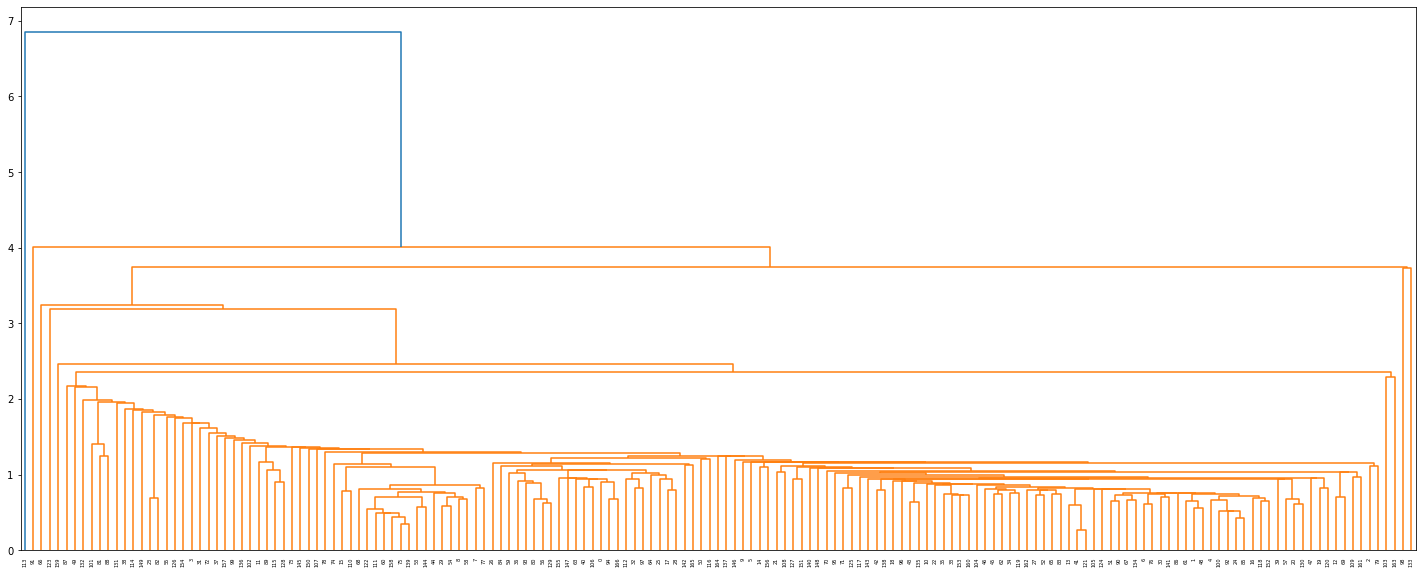

In [49]:
from scipy.cluster.hierarchy import dendrogram #biblioteca para fazer o dendograma
import matplotlib.pyplot as plt #plotar o gráfico

fig = plt.figure(figsize=(25, 10))
dendrogram(coeficientes_single) #contruir o dendograma utilizando o encadeamento único
plt.show()

##### 2º Teste: Elaboração da clusterização hierárquica como "complete linkage"

O método de encadeamento single linkage não permite uma clusterização útil.

In [50]:
coeficientes_complete = linkage(paises_padronizado, method="complete", metric='euclidean') #single
coeficientes_complete[0:10] # mostra as 10 primeiras linhas

array([[ 41.        , 121.        ,   0.27051092,   2.        ],
       [ 75.        , 139.        ,   0.34593963,   2.        ],
       [ 24.        ,  85.        ,   0.42313147,   2.        ],
       [111.        , 158.        ,   0.49433038,   2.        ],
       [100.        , 169.        ,   0.5397    ,   3.        ],
       [ 60.        , 122.        ,   0.54410516,   2.        ],
       [  1.        ,  48.        ,   0.55954063,   2.        ],
       [ 53.        , 144.        ,   0.56879938,   2.        ],
       [ 29.        ,  54.        ,   0.59031996,   2.        ],
       [ 20.        , 130.        ,   0.60456236,   2.        ]])

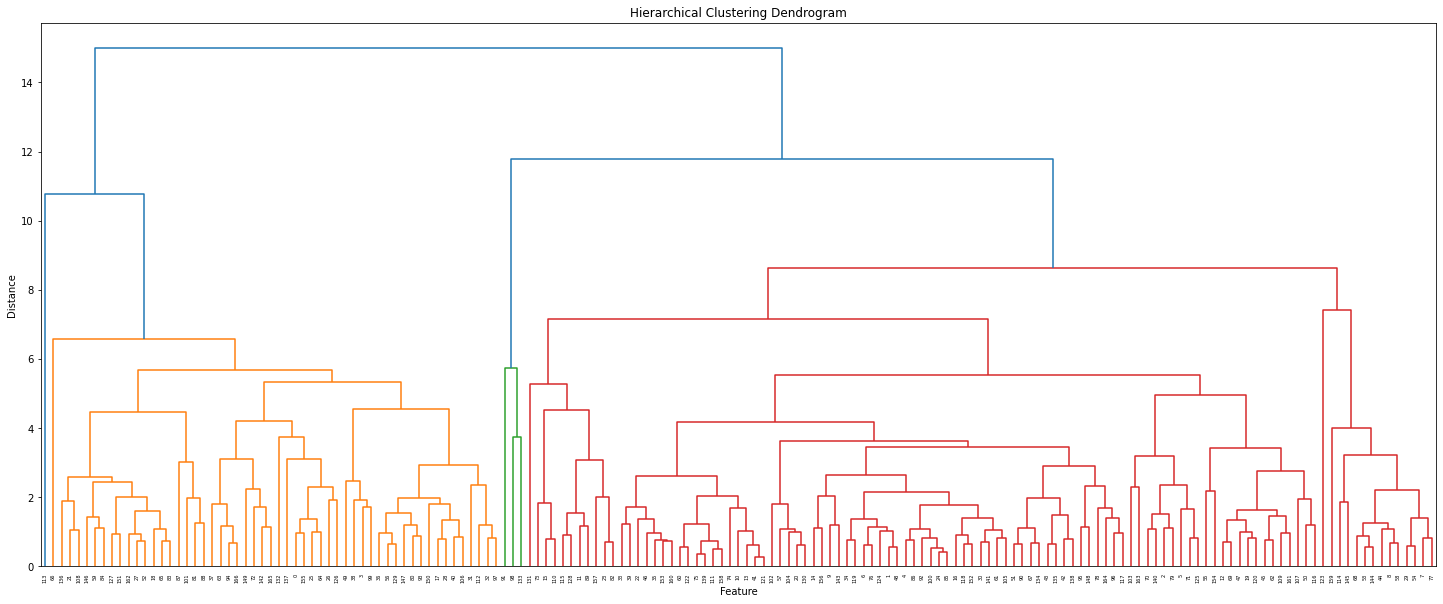

In [51]:
fig = plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Feature')
plt.ylabel('Distance')
dendrogram(coeficientes_complete) #contruir o dendograma utilizando o encadeamento único
plt.show()

##### 3º Teste: Elaboração da clusterização hierárquica como "average linkage"

In [52]:
coeficientes_average = linkage(paises_padronizado, method="average", metric='euclidean') #single
coeficientes_average[0:10] # mostra as 10 primeiras linhas

array([[ 41.        , 121.        ,   0.27051092,   2.        ],
       [ 75.        , 139.        ,   0.34593963,   2.        ],
       [ 24.        ,  85.        ,   0.42313147,   2.        ],
       [111.        , 158.        ,   0.49433038,   2.        ],
       [100.        , 169.        ,   0.52803589,   3.        ],
       [ 60.        , 122.        ,   0.54410516,   2.        ],
       [  1.        ,  48.        ,   0.55954063,   2.        ],
       [ 53.        , 144.        ,   0.56879938,   2.        ],
       [ 29.        ,  54.        ,   0.59031996,   2.        ],
       [ 20.        , 130.        ,   0.60456236,   2.        ]])

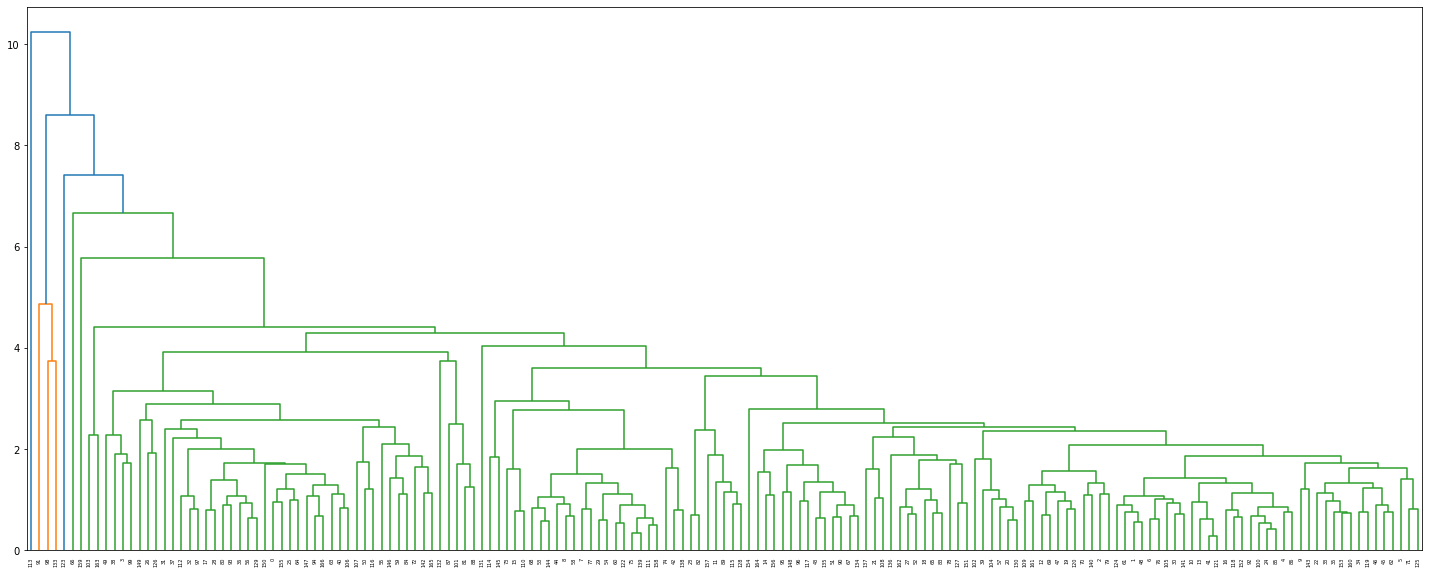

In [53]:
fig = plt.figure(figsize=(25, 10))
dendrogram(coeficientes_average) #contruir o dendograma utilizando o encadeamento único
plt.show()

##### O complete linkage apresentou um melhor dendograma

In [54]:
from scipy.cluster.hierarchy import cut_tree #biblioteca
paises_padronizado_df['Cluster_H'] = cut_tree(coeficientes_complete, n_clusters=12)
paises_padronizado_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_H
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,2
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,3
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,6
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,2
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,0


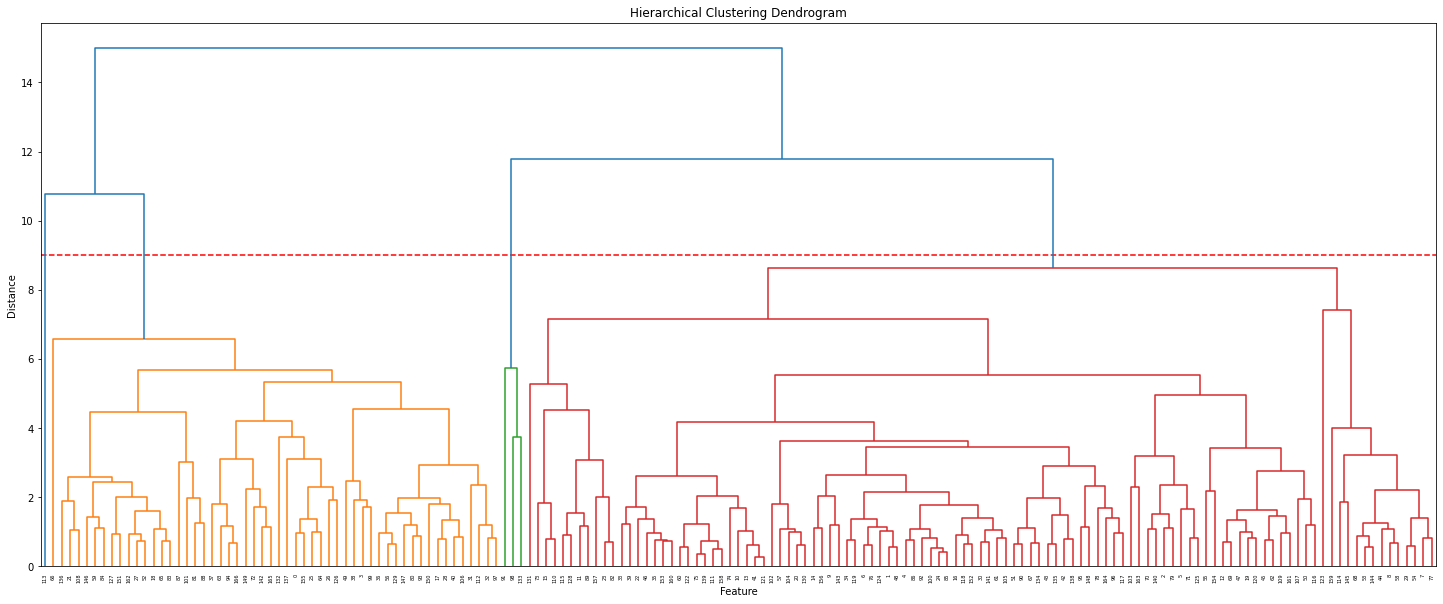

In [55]:
fig = plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.hlines(9,0,3000, colors='red', linestyles='dashed', label='')
dendrogram(coeficientes_complete) #contruir o dendograma utilizando o encadeamento único
plt.show()

##### Definindo o número de cluster pela altura do salto no dendograma

In [56]:
from scipy.cluster.hierarchy import fcluster

max_d = 9 # ver último dendograma
clusters = fcluster(coeficientes_complete,t=max_d, criterion='distance')
df_clust = pd.DataFrame({'Países':paises['country'], 'Cluster':clusters})
df_clust

,Países,Cluster
0,Afghanistan,1
1,Albania,4
2,Algeria,4
3,Angola,1
4,Antigua and Barbuda,4
...,...,...
162,Vanuatu,1
163,Venezuela,4
164,Vietnam,4
165,Yemen,1


##### Contagem de clientes por cluster

In [57]:
df_clust.groupby('Cluster').count().reset_index()

,Cluster,Países
0,1,54
1,2,1
2,3,3
3,4,109


##### Anova

In [58]:
#bibliotecas para análise de variância (ANOVA)
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [59]:
modelo_child_mort = ols('child_mort ~ Cluster_H', data=paises_padronizado_df).fit()
modelo_exports = ols('exports ~ Cluster_H', data=paises_padronizado_df).fit()
modelo_health = ols('health ~ Cluster_H', data=paises_padronizado_df).fit()
modelo_imports = ols('imports ~ Cluster_H', data=paises_padronizado_df).fit()
modelo_income = ols('income ~ Cluster_H', data=paises_padronizado_df).fit()
modelo_inflation = ols('inflation ~ Cluster_H', data=paises_padronizado_df).fit()
modelo_life_expec = ols('life_expec ~ Cluster_H', data=paises_padronizado_df).fit()
modelo_total_fer = ols('total_fer ~ Cluster_H', data=paises_padronizado_df).fit()
modelo_gdpp = ols('gdpp ~ Cluster_H', data=paises_padronizado_df).fit()

aov_child_mort = sm.stats.anova_lm(modelo_child_mort)
aov_exports = sm.stats.anova_lm(modelo_exports)
aov_health = sm.stats.anova_lm(modelo_health)
aov_imports = sm.stats.anova_lm(modelo_imports)
aov_income = sm.stats.anova_lm(modelo_income)
aov_inflation = sm.stats.anova_lm(modelo_inflation)
aov_life_expec = sm.stats.anova_lm(modelo_life_expec)
aov_total_fer = sm.stats.anova_lm(modelo_total_fer)
aov_gdpp = sm.stats.anova_lm(modelo_gdpp)

print(f'child_mort\n{aov_child_mort}\n\n')
print(f'exports\n{aov_exports}\n\n')
print(f'health\n{aov_health}\n\n')
print(f'imports\n{aov_imports}\n\n')
print(f'income\n{aov_income}')
print(f'inflation\n{aov_inflation}\n\n')
print(f'life_expec\n{aov_life_expec}\n\n')
print(f'total_fer\n{aov_total_fer}\n\n')
print(f'gdpp\n{aov_gdpp}\n\n')

child_mort
              df      sum_sq   mean_sq         F   PR(>F)
Cluster_H    1.0    0.374075  0.374075  0.370425  0.54361
Residual   165.0  166.625925  1.009854       NaN      NaN


exports
              df      sum_sq    mean_sq         F    PR(>F)
Cluster_H    1.0   22.292733  22.292733  25.41891  0.000001
Residual   165.0  144.707267   0.877014       NaN       NaN


health
              df      sum_sq   mean_sq         F   PR(>F)
Cluster_H    1.0    0.883462  0.883462  0.877524  0.35025
Residual   165.0  166.116538  1.006767       NaN      NaN


imports
              df     sum_sq    mean_sq         F        PR(>F)
Cluster_H    1.0   26.63688  26.636880  31.31225  8.967050e-08
Residual   165.0  140.36312   0.850686       NaN           NaN


income
              df      sum_sq    mean_sq          F        PR(>F)
Cluster_H    1.0   24.303962  24.303962  28.102769  3.645913e-07
Residual   165.0  142.696038   0.864824        NaN           NaN
inflation
              df      sum_sq 